# Introduction to Scikit-Learn (sklearn)

This notebook demonstrates some of the useful functions of the beautiful Scikit-Learn library.

What we are going to cover:

In [1]:
# Let's listify the contents
what_were_covering = [
"0. An end to end Scikit-Learn workflow",
"1. Getting the data ready",
"2. Choose the right estimator/algorithm for our problems",
"3. Fit the model/algorithm and use it to make predictions on our data",
"4. Evaluating a model",
"5. Improve a model",
"6. Save and load a trained model",
"7. Putting it all together !"]

In [2]:
what_were_covering

['0. An end to end Scikit-Learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together !']

In [3]:
# Standart imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# matplotlib.inline

## 0. An end-to-end Scikit-Learn workflow

In [4]:
# 1. Get the data ready
import pandas as pd
heart_disease = pd.read_csv("041 heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
# Create X (features matrix)
X = heart_disease.drop("target", axis=1)
X

#Create Y (labels matrix)
y = heart_disease["target"]
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [6]:
import warnings
warnings.filterwarnings("default")

In [7]:
# 2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier # Capable of learning patterns in data and then classifying whether a sample aka a row is one thing or another. 
clf = RandomForestClassifier()
# We'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [8]:
# 3. Fit the model to the training data
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 80% of the date will be used for training

In [10]:
import sklearn
sklearn.show_versions()


System:
    python: 3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]
executable: C:\Users\User\anaconda3\python.exe
   machine: Windows-10-10.0.22000-SP0

Python dependencies:
          pip: 22.2.2
   setuptools: 63.4.1
      sklearn: 1.0.2
        numpy: 1.21.5
        scipy: 1.9.1
       Cython: 0.29.32
       pandas: 1.4.4
   matplotlib: 3.5.2
       joblib: 1.1.0
threadpoolctl: 2.2.0

Built with OpenMP: True


C:\Users\User\anaconda3\lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [11]:
clf.fit(X_train, y_train);

In [12]:
# make a prediction
data = np.random.randint(400, size=(1,13))
y_label = pd.DataFrame(data,
                       columns = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal"])
y_label

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,161,141,148,84,58,63,262,96,129,164,296,106,5


In [13]:
y_predi = clf.predict(y_label)
y_predi

array([0], dtype=int64)

In [14]:
y_preds = clf.predict(X_test)
y_preds

array([1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [15]:
y_test

104    1
6      1
226    0
124    1
78     1
      ..
102    1
289    0
3      1
85     1
114    1
Name: target, Length: 61, dtype: int64

In [16]:
# 4. Evaluate the model on the training data and test data
clf.score(X_train, y_train)

1.0

In [17]:
clf.score(X_test, y_test)

0.8688524590163934

In [18]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [19]:
confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 3, 29]], dtype=int64)

In [20]:
accuracy_score(y_test, y_preds)

0.8688524590163934

In [21]:
# 5. Improve a model
# Try different amount of n_estimators
np.random.seed(42)
for i in range(10, 110, 10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train) # Jouer avec les estimators pour améliorer le score.
    print(f"Model accuracy on test set: {clf.score(X_test, y_test) * 100:.2f}%")
    print(" ")

Trying model with 10 estimators...
Model accuracy on test set: 80.33%
 
Trying model with 20 estimators...
Model accuracy on test set: 83.61%
 
Trying model with 30 estimators...
Model accuracy on test set: 86.89%
 
Trying model with 40 estimators...
Model accuracy on test set: 81.97%
 
Trying model with 50 estimators...
Model accuracy on test set: 86.89%
 
Trying model with 60 estimators...
Model accuracy on test set: 86.89%
 
Trying model with 70 estimators...
Model accuracy on test set: 88.52%
 
Trying model with 80 estimators...
Model accuracy on test set: 83.61%
 
Trying model with 90 estimators...
Model accuracy on test set: 88.52%
 
Trying model with 100 estimators...
Model accuracy on test set: 85.25%
 


In [22]:
clf.score(X_test, y_test)

0.8524590163934426

In [23]:
# 6. Save a model and load it 
import pickle 
pickle.dump(clf, open("random_forest_model_1.pkl", "wb")) # write binary

C:\Users\User\AppData\Local\Temp\ipykernel_24112\804680050.py:3: ResourceWarning: unclosed file <_io.BufferedWriter name='random_forest_model_1.pkl'>
  pickle.dump(clf, open("random_forest_model_1.pkl", "wb")) # write binary


In [24]:
loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb")) # write binary
loaded_model.score(X_test, y_test)

C:\Users\User\AppData\Local\Temp\ipykernel_24112\3076607492.py:1: ResourceWarning: unclosed file <_io.BufferedReader name='random_forest_model_1.pkl'>
  loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb")) # write binary


0.8524590163934426

In [25]:
clf = RandomForestClassifier(30).fit(X_train, y_train)

In [26]:
clf.score(X_test, y_test)

0.8852459016393442

In [27]:
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=30)

## 1. Getting our data ready to be used with machine learning

Three main things we have to do:

    1. Split the data into features and labels (usually 'X' & 'Y')
    2. Filling (also called imputing) or disregarding missing values
    3. Converting non numerical values to numerical values (also called featuring encoding)
     
    

In [28]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [29]:
X = heart_disease.drop("target", axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [30]:
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [31]:
# Splitting the data between training and test sets.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 80% of the date will be used for training

In [32]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [33]:
X.shape

(303, 13)

In [34]:
len(heart_disease)

303

### 1.1 Make sure it's all numerical

In [35]:
car_sales = pd.read_csv("car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [36]:
len(car_sales)

1000

In [37]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [38]:
# Split into X/y

X = car_sales.drop("Price", axis=1)
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [39]:
y = car_sales["Price"]
y.head()

0    15323
1    19943
2    28343
3    13434
4    14043
Name: Price, dtype: int64

In [40]:
# Split into training and test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [41]:
from sklearn.ensemble import RandomForestRegressor # Capable of learning patterns in data and then predicting a number. 
model = RandomForestRegressor()

In [42]:
# model.fit(X_train, y_train)
# model.score(X_test, y_test)

In [43]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categories_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                  one_hot,
                                  categories_features)],
                                   remainder="passthrough") # N'y touche pas.
transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [44]:
car_sales["Doors"].value_counts()

4    856
5     79
3     65
Name: Doors, dtype: int64

In [45]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [46]:
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [47]:
# Lest's refit the model

np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, 
                                                    y, 
                                                    test_size=0.2)
model.fit(X_train, y_train)

RandomForestRegressor()

In [48]:
model.score(X_test, y_test)

0.3235867221569877

### 1.2 What if there were missing values ?

1. Fill them with some value (also known as imputation).
2. Remove the samples with missing data altogether.



In [49]:
# Import car sales missing data
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing.head(10)

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
5,Honda,Red,42652.0,4.0,23883.0
6,Toyota,Blue,163453.0,4.0,8473.0
7,Honda,White,NaN,4.0,20306.0
8,NaN,White,130538.0,4.0,9374.0
9,Honda,Blue,51029.0,4.0,26683.0


In [50]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [51]:
car_sales_missing.isnull().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [52]:
car_sales_missing["Doors"].value_counts()

4.0    811
5.0     75
3.0     64
Name: Doors, dtype: int64

### Option 1: Fill missing data with Pandas

In [53]:
# Fill the "Make" column
car_sales_missing["Make"].fillna("missing", inplace=True)

# Fill the "Colour" column
car_sales_missing["Colour"].fillna("missing", inplace=True)

# Fill the "Odometer (KM)" column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)

# Fill the "Doors" column
car_sales_missing["Doors"].fillna(4, inplace=True)

car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,missing,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [54]:
# Check our dataframe again
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [55]:
# Remove rows with missing Price value
car_sales_missing.dropna(inplace=True)

In [56]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [57]:
len(car_sales_missing)

950

In [58]:
# Create X and y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [59]:
# Let's try and convert data to numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categories_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                  one_hot,
                                  categories_features)],
                                   remainder="passthrough") # N'y touche pas.
transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

In [60]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,35431.0,15323.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0,19943.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,84714.0,28343.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,154365.0,13434.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0,14043.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0,32042.0
946,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,155144.0,5716.0
947,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0,31570.0
948,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,215883.0,4001.0


### Option 2: Fill missing values with Scikit-Learn

In [61]:
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [62]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [63]:
# Drop the rows with no labels
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [64]:
# Split into X and y 
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [65]:
X.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
dtype: int64

In [66]:
# Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' and numerical with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
doors_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define columns
cat_features = ["Make", "Colour"]
doors_features = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (something that fills missing data) #Process' name imputation
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("doors_imputer", doors_imputer, doors_features),
    ("num_imputer", num_imputer, num_features)
])

# Transform the data
filled_X = imputer.fit_transform(X)
filled_X 

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [67]:
car_sales_filled = pd.DataFrame(filled_X,
                               columns=["Make", "Colour", "Doors", "Odometer (KM)"])
car_sales_filled

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0
...,...,...,...,...
945,Toyota,Black,4.0,35820.0
946,missing,White,3.0,155144.0
947,Nissan,Blue,4.0,66604.0
948,Honda,White,4.0,215883.0


In [68]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [69]:
# Let's try and convert data to numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categories_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                  one_hot,
                                  categories_features)],
                                   remainder="passthrough") # N'y touche pas.
transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [70]:
# Split into training and test
np.random.seed(42)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

# Let's fit a model

from sklearn.ensemble import RandomForestRegressor # Capable of learning patterns in data and then predicting a number. 
model = RandomForestRegressor()

model.fit(X_train, y_train)

RandomForestRegressor()

In [71]:
model.score(X_test, y_test)

0.21990196728583944

In [72]:
len(car_sales_filled), len(car_sales)

(950, 1000)

In [73]:
what_were_covering

['0. An end to end Scikit-Learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together !']

## 2. Choose the right estimator/algorithm for our problems

Scikit-Learn uses estimator as another term for machine learning model or algorithm.

* Classification - predicting wether a sample is one thing or another.
* Regression - predicting a number.

### 2.1 Picking a macine learning model for a regression problem


In [74]:
# Import Boston housing dataset
from sklearn.datasets import load_boston
boston = load_boston()
boston;

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

In [75]:
boston_df = pd.DataFrame(boston["data"], columns=boston["feature_names"])
boston_df["target"] = pd.Series(boston["target"])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [76]:
# How many samples ?
len(boston_df)

506

In [77]:
# Let's try the Ridge Regression model
from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(42)

# Create the data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split into training and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Ridge model
model = Ridge()
model.fit(X_train, y_train)

# Check the score of the Ridge model on test data
model.score(X_test, y_test)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: DeprecationWarning: The 'sym_pos' keyword is deprecated and should be replaced by using 'assume_a = "pos"'. 'sym_pos' will be removed in SciPy 1.11.0.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


0.6662221670168518

How do we improve this score ?

What if Ridge wasn't working ?

Let's refer to the map... https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [78]:
# Let's try the random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split into training and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate random Forest Regressor model
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# Check the score of the random Forest Regressor model on test data
rf.score(X_test, y_test)

0.8654448653350507

### 2.2 Choosing an estimator for a classification problem

Let's go to the map...https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [79]:
heart_disease = pd.read_csv("041 heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [80]:
len(heart_disease)

303

Consulting the map and it says to try LinearSVC.

In [81]:
# Import the linearSVC estimator class
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into training and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate LinearSVC
clf = LinearSVC()
clf.fit(X_train, y_train)

# Evaluate the LinearSVC
clf.score(X_test, y_test)

C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

In [82]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [83]:
# Let's try the random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Create the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into training and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate random Forest Classifier model
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# Check the score of the random Forest Classifier model on test data
rfc.score(X_test, y_test)

0.8524590163934426

Tidbit:
    
    1. If you have structured data, used ensemble methods.
    2. If you have unstructured data, use deep learning or transfer learning.

In [84]:
what_were_covering

['0. An end to end Scikit-Learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together !']

## 3.  Fit the model/algorithm and use it to make predictions on our data 

### 3.1 Fitting the model to the data

Different names for:
* `X` = features, features variables, data
* `y` = labels, target, target variables

In [85]:
# Let's try the random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Create the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into training and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate random Forest Classifier model
rfc = RandomForestClassifier()

# Fit the model to the data
rfc.fit(X_train, y_train)

# Check the score of the random Forest Classifier model on test data
rfc.score(X_test, y_test)

0.8524590163934426

In [86]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [87]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [88]:
y.tail()

298    0
299    0
300    0
301    0
302    0
Name: target, dtype: int64

### 3.2 Make predictions using a machine learning model

2 ways to make predictions:
1. `predict()`
2. `predict_proba()`

In [89]:
# Use a trained model to make predictions
# clf.predict(np.array([1, 7, 8, 3, 4])) # this doesn't work...

In [90]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [91]:
rfc.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [92]:
np.array([y_test])

array([[0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0]], dtype=int64)

In [93]:
# Compare predictions to truth to evaluate the model
y_preds = rfc.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [94]:
rfc.score(X_test, y_test)

0.8524590163934426

In [95]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

 Make predictions with `predict_proba()`

In [96]:
# prebict_proba() returns probabilities of a classification label
rfc.predict_proba(X_test[:5]) # A gauche la probabilité d'avoir 0 et à droite celle d'avoir 1.

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [97]:
# Let's predict() on the same data...
rfc.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

`predict()` can also be used for regression models.


In [98]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [99]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
X = boston_df.drop('target', axis=1)
y = boston_df['target']

# Split into training and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate random Forest Regressor model
rf = RandomForestRegressor()
model = rf.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

# Check the score of the random Forest Regressor model on test data
rf.score(X_test, y_test)

0.8654448653350507

In [100]:
y_preds[:10]

array([23.081, 30.574, 16.759, 23.46 , 16.893, 21.644, 19.113, 15.334,
       21.14 , 20.639])

In [101]:
np.array(y_test[:10])

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [102]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_preds, y_test)

2.136382352941176

## 4. Evaluating a machine learning model

Three ways to evaluate Sckitit-Learn models/estimators
1. Estimator `score` method
2. The `scoring` parameter
3. Problem-specific metric functions.

### 4.1 Evaluating a model with the `score` method

In [103]:
# Let's try the random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Create the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into training and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate random Forest Classifier model
rfc = RandomForestClassifier()

# Fit the model to the data
rfc.fit(X_train, y_train)

# Check the score of the random Forest Classifier model on test data
rfc.score(X_test, y_test)

0.8524590163934426

Let's do the same but for regression

In [104]:
# Let's try the random Forest Regression
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split into training and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate random Forest Regression model
rfc = RandomForestRegressor()

# Fit the model to the data
rfc.fit(X_train, y_train)

# Check the score of the random Forest Regression model on test data
rfc.score(X_test, y_test)

0.8654448653350507

### 4.2 Evaluating a model using the `scoring` parameter 

In [105]:
from sklearn.model_selection import cross_val_score

# Let's try the random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Create the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into training and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate random Forest Classifier model
rfc = RandomForestClassifier()

# Fit the model to the data
rfc.fit(X_train, y_train)

# Check the score of the random Forest Classifier model on test data
rfc.score(X_test, y_test)

0.8524590163934426

In [106]:
cross_val_score(rfc, X, y) # Modifie l'échantillon choisit pour les tests et train.

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [107]:
cross_val_score(rfc, X, y, cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [108]:
np.random.seed(42)

# Single training and test split score
rfc_single_score = rfc.score(X_test, y_test)

# Take the mean of 5-fold cross-validation score
rfc_cross_val_score = np.mean(cross_val_score(rfc, X, y))

# Compare the two
rfc_single_score, rfc_cross_val_score # Accuracy of a model is the mean of the k-fold cross-validation score

(0.8524590163934426, 0.8248087431693989)

In [109]:
# Default scoring parameter of classifier = mean accuracy

In [110]:
# Scoring parameter set to None by default
cross_val_score(rfc, X, y, cv=5, scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

In [111]:
from sklearn.model_selection import cross_val_score

# Let's try the random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Create the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into training and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate random Forest Classifier model
rfc = RandomForestClassifier()

cross_val_score = cross_val_score(rfc, X, y, cv=5, scoring=None)


In [112]:
np.mean(cross_val_score)

0.8215300546448088

In [113]:
print(f"Heart Disease Classifier Cross_Validated Accuracy: {np.mean(cross_val_score) *100:.2f}%")

Heart Disease Classifier Cross_Validated Accuracy: 82.15%


**Area under the receiver operator characteristic curve (AUC/ROC)**

* Area under curve (AUC)
* ROC curve

ROC curves are a comparison of a model's true positive rate (tpr) versus a model's false positive rate (fpr).

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [115]:
from sklearn.metrics import roc_curve

# Make predictions with probabilities
y_probs = rfc.predict_proba(X_test)
y_probs[:10]

array([[0.89, 0.11],
       [0.05, 0.95],
       [0.1 , 0.9 ],
       [0.79, 0.21],
       [0.09, 0.91],
       [0.02, 0.98],
       [0.76, 0.24],
       [0.19, 0.81],
       [0.62, 0.38],
       [0.99, 0.01]])

In [116]:
y_probs_positive = y_probs[:,1]
y_probs_positive

array([0.11, 0.95, 0.9 , 0.21, 0.91, 0.98, 0.24, 0.81, 0.38, 0.01, 0.21,
       0.25, 0.46, 0.55, 0.32, 0.76, 0.69, 0.98, 0.78, 0.52, 0.01, 0.68,
       0.91, 0.05, 0.67, 0.67, 0.  , 0.03, 0.12, 0.94, 0.24, 0.63, 0.99,
       0.86, 0.1 , 0.  , 0.89, 0.  , 0.98, 0.4 , 0.73, 0.44, 0.83, 0.49,
       0.71, 0.  , 0.09, 0.07, 0.48, 0.89, 0.05, 0.84, 0.73, 1.  , 0.47,
       0.71, 0.96, 0.47, 0.32, 0.92, 0.6 ])

In [117]:
y_test

213    0
140    1
15     1
202    0
88     1
      ..
124    1
173    0
209    0
154    1
248    0
Name: target, Length: 61, dtype: int64

In [118]:
# Calculate fpr, tpr and threshold
fpr, tpr, threshold = roc_curve(y_test, y_probs_positive)

# Check the false positive rates
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.03846154,
       0.03846154, 0.03846154, 0.03846154, 0.11538462, 0.11538462,
       0.15384615, 0.15384615, 0.19230769, 0.19230769, 0.23076923,
       0.26923077, 0.26923077, 0.30769231, 0.34615385, 0.5       ,
       0.69230769, 0.73076923, 0.76923077, 0.84615385, 1.        ])

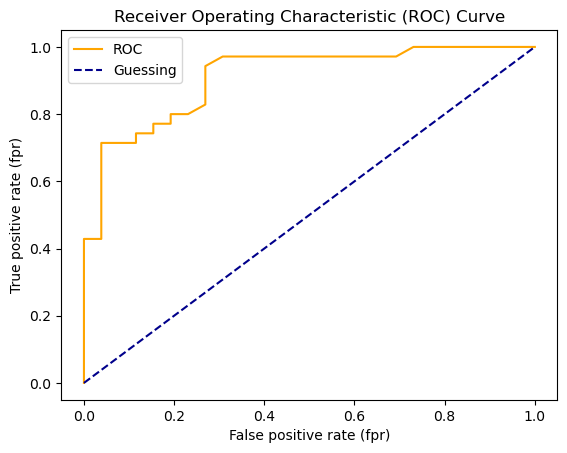

In [119]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curves given the false positive rate (fpr)
    and the true positive rate (tpr) of a model.
    """
    # Plot roc curve 
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")
    
    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (fpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

In [120]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.9093406593406593

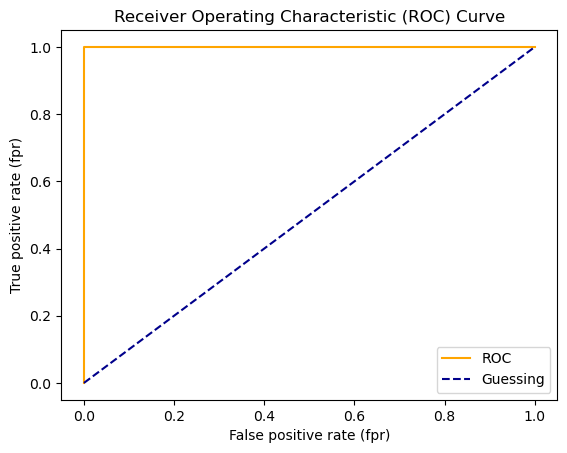

In [121]:
# Plot perfect ROC curves and AUC score
fpr, tpr, threshold = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [122]:
# Perfect AUC score
roc_auc_score(y_test, y_test)

1.0

**Confusion matrix**

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

In essence, giving you an idea of where the model is getting confused.

In [123]:
from sklearn.metrics import confusion_matrix

y_preds = rfc.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[21,  5],
       [ 8, 27]], dtype=int64)

In [124]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,
           y_preds,
           rownames=["Actual label"],
           colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual label,,
0,21,5
1,8,27


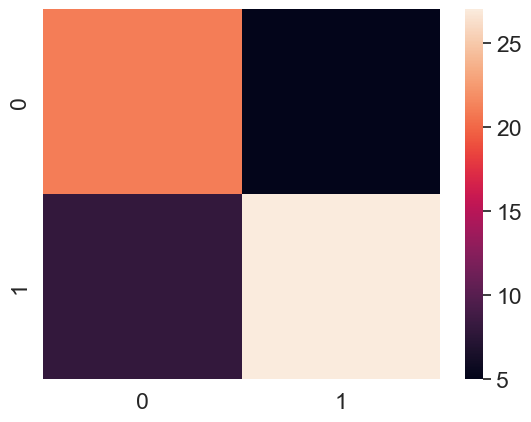

In [125]:
# Make our confusion matrix more visual with Seaborn's heatmap()
import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# Plot it using Seaborn
sns.heatmap(conf_mat);

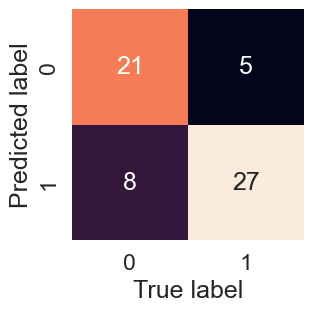

In [126]:
def plot_conf_mat(conf_mat):
    """
    Plot a confusion matrix heatplot using heatmap
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(conf_mat,
                    annot=True, # Annotate the boxes with cnf_mat info 
                    cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label");
    
plot_conf_mat(conf_mat)

In [127]:
from sklearn.metrics import plot_confusion_matrix

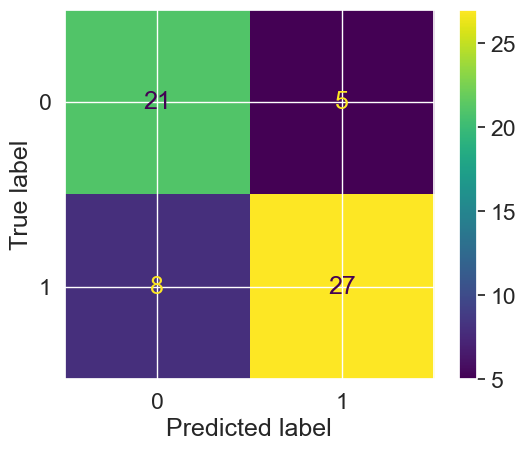

In [128]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_preds)

**Classification report**

In [129]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds)) # précision: nombre de vrai positif et négatif
                                            # recall: nombre de prévu sur l'ensemble positif et négatif.

              precision    recall  f1-score   support

           0       0.72      0.81      0.76        26
           1       0.84      0.77      0.81        35

    accuracy                           0.79        61
   macro avg       0.78      0.79      0.78        61
weighted avg       0.79      0.79      0.79        61



In [130]:
# Where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one positive case

disease_preds = np.zeros(10000) # model predicts every case as 0

pd.DataFrame(classification_report(disease_true,
                                  disease_preds,
                                  output_dict=True))

C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


To summarize classification metrics:
    
 *  **Accuracy** is a good measure to start with if all classes are balanced (e.g same amount of samples which are labelled
      with 1 or 0).  
 *  **Precision** and **recall** become more important when classes are imbalanced.
 * If false positive predictions are worse than false negative, aim for higher precision.
 * If false negative predictions are worse than false positive, aim for higher recall.
 * **F1-score** a combination of precision and recall.

### 4.2.2 Regression model evaluation metrics

Model evaluation metrics documentation - https://scikit-learn.org/stable/modules/model_evaluation.html

1. R^2 (pronouced r-squared) or coefficient of determination.
2. Mean absolute error (MAE).
3. Mean squarred error (MSE).

**R^2**

Compares your models predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, it's R^2 value would be 0. And if your model perfectly predicts a range of numbers value would be 1.
Moins l'infinie à 0 la différence entre prédiction et valeur réelle va au delà de la différence entre valeur réelle et leur moyenne, à 0 la différence et la même, entre 0 et 1 la différence est inférieur, à 1 aucune dfférence. 

In [131]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train);

In [132]:
model.score(X_test, y_test)

0.8654448653350507

In [133]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

In [134]:
y_test.mean()

21.488235294117654

In [135]:
y_test_mean

array([21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48

In [136]:
r2_score(y_test, y_test_mean)

2.220446049250313e-16

In [137]:
y_test

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
       ... 
412    17.9
436     9.6
411    17.2
86     22.5
75     21.4
Name: target, Length: 102, dtype: float64

In [138]:
r2_score(y_test, y_test)

1.0

In [139]:
y_preds = model.predict(X_test)

In [140]:
r2_score(y_test, y_preds)

0.8654448653350507

**Mean absolute error (MAE)**

MAE is the average of the absolute differences between predictions and actual predictions. It gives you and idea of how wrong your models predictions are.

In [141]:
# Mean absolute error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_preds)
mae

2.136382352941176

In [142]:
df = pd.DataFrame(data={"actual_values": y_test,
                       "predicted_values": y_preds})
df["differences"] = df["predicted_values"] - df["actual_values"]
df["mean_differences"] = df["differences"].abs().mean()
df

,actual_values,predicted_values,differences,mean_differences
173,23.6,23.081,-0.519,2.136382
274,32.4,30.574,-1.826,2.136382
491,13.6,16.759,3.159,2.136382
72,22.8,23.460,0.660,2.136382
452,16.1,16.893,0.793,2.136382
...,...,...,...,...
412,17.9,13.159,-4.741,2.136382
436,9.6,12.476,2.876,2.136382
411,17.2,13.612,-3.588,2.136382
86,22.5,20.205,-2.295,2.136382


**Mean squared error (MSE)**

In [143]:
# Mean squared error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_preds)
mse

9.867437068627442

In [144]:
df["mean_square_differences"] = np.square(df["differences"]).mean()
df

,actual_values,predicted_values,differences,mean_differences,mean_square_differences
173,23.6,23.081,-0.519,2.136382,9.867437
274,32.4,30.574,-1.826,2.136382,9.867437
491,13.6,16.759,3.159,2.136382,9.867437
72,22.8,23.460,0.660,2.136382,9.867437
452,16.1,16.893,0.793,2.136382,9.867437
...,...,...,...,...,...
412,17.9,13.159,-4.741,2.136382,9.867437
436,9.6,12.476,2.876,2.136382,9.867437
411,17.2,13.612,-3.588,2.136382,9.867437
86,22.5,20.205,-2.295,2.136382,9.867437


### 4.23 Finally using the `scoring` parameter

In [145]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf.fit(X_train, y_train)

RandomForestClassifier()

In [146]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [147]:
# Cross-validated accuracy
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f} % ")

The cross-validated accuracy is: 82.48 % 


In [148]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, scoring="accuracy")
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f} % ")

The cross-validated accuracy is: 82.48 % 


In [149]:
# Precision
cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
cv_precision

array([0.76315789, 0.90322581, 0.83870968, 0.79411765, 0.74358974])

In [150]:
print(f"The cross-validated precision is: {np.mean(cv_precision)*100:.2f} % ")

The cross-validated precision is: 80.86 % 


In [151]:
# Recall
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
cv_recall 

array([0.87878788, 0.84848485, 0.78787879, 0.78787879, 0.90909091])

In [152]:
print(f"The cross-validated recall is: {np.mean(cv_recall)*100:.2f} % ")

The cross-validated recall is: 84.24 % 


In [153]:
# f1
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring="f1")
cv_f1

array([0.8358209 , 0.89230769, 0.84848485, 0.83076923, 0.8       ])

In [154]:
print(f"The cross-validated f1 is: {np.mean(cv_f1)*100:.2f} % ")

The cross-validated f1 is: 84.15 % 


How about our regression model ?

In [155]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

model = RandomForestRegressor()

In [156]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, scoring="r2")
cv_r2

array([0.77231143, 0.86035935, 0.74664002, 0.47632078, 0.26630379])

In [157]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y)
np.mean(cv_r2)

0.6243870737930857

In [158]:
# Mean absolute error
cv_mae = cross_val_score(model, X, y, scoring="neg_mean_absolute_error")
cv_mae

array([-2.13045098, -2.49771287, -3.45471287, -3.81509901, -3.11813861])

In [159]:
# Mean squared error
cv_mse = cross_val_score(model, X, y, scoring="neg_mean_squared_error")
cv_mse

array([ -7.8141513 , -12.94343325, -19.11614042, -46.28783248,
       -19.48161818])

In [160]:
np.mean(cv_mse)

-21.12863512415064

### 4.3 Using different evaluation metrics as Scikit-Learn functions 

**Classification evaluation functions**

In [161]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make some predictions
y_preds = clf.predict(X_test)

# Evaluate the classifier
print("Classifier metrics on the test set")
print(f"Accuracy: {accuracy_score(y_test, y_preds)*100:.2f} %")
print(f"Precision: {precision_score(y_test, y_preds)*100:.2f} %") # Nombre de vrai positif sur nombre de prédiction
print(f"Recall: {recall_score(y_test, y_preds)*100:.2f} %") # Nombre de vrai positif sur nombre de positif
print(f"F1: {f1_score(y_test, y_preds)*100:.2f} %")

Classifier metrics on the test set
Accuracy: 85.25 %
Precision: 84.85 %
Recall: 87.50 %
F1: 86.15 %


**Regression evaluation functions**

In [162]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make some predictions
y_preds = model.predict(X_test)

# Evaluate the classifier
print("Regression metrics on the test set")
print(f"R^2: {r2_score(y_test, y_preds)*100:.2f} %")
print(f"MAE: {mean_absolute_error(y_test, y_preds)}") 
print(f"MSE: {mean_squared_error(y_test, y_preds)}") 

Regression metrics on the test set
R^2: 86.54 %
MAE: 2.136382352941176
MSE: 9.867437068627442


In [163]:
what_were_covering

['0. An end to end Scikit-Learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together !']

## 5. Improving a model

First predictions = baseline predictions.
First model = baseline model.

From a data perspective:

* Could we collect more data ? (generally the more data, the better)
* Could we improve our data ?

From a model perspective:

* Is there a model we could use ?
* Could we improve the current model ?

Hyperparameters vs Parameters:

* Parameters = model find these patterns in data.
* Hyperparameters = settings on a model you can adjust to (potentially) improve its ability to find patterns.

Three ways to adjust hyperparameters:
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

In [164]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [165]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tunning hyperparameters by hand

Let's make 3 sets, tuning, validation and test.

We're going to try and adjust:

* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [166]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels
    on a classification. 
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                  "precision": round(precision, 2),
                  "recall": round(recall, 2),
                  "f1": round(f1, 2)}
    print(f"Accuracy: {accuracy*100:.2f} %")
    print(f"Precision: {precision*100:.2f} %")
    print(f"Recall: {recall*100:.2f} %")
    print(f"F1 score: {f1*100:.2f} %")
    
    return metric_dict

In [167]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split into X and y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split the data into train, validation & test sets
train_split = round(0.7 * len(heart_disease_shuffled))
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled))
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split: valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

len(heart_disease_shuffled), len(X_train), len(X_valid), len(X_test)

clf = RandomForestClassifier()

clf.fit(X_train, y_train)

# Make baseline predictions
y_preds = clf.predict(X_valid)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Accuracy: 82.22 %
Precision: 81.48 %
Recall: 88.00 %
F1 score: 84.62 %


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [168]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [169]:
np.random.seed(42)

# Create a differente classifier with different hyperparameters

clf_2 = RandomForestClassifier(n_estimators=100)
clf_2.fit(X_train, y_train)

y_preds_2 = clf_2.predict(X_valid)

clf_2_metrics = evaluate_preds(y_valid, y_preds_2)

Accuracy: 82.22 %
Precision: 84.00 %
Recall: 84.00 %
F1 score: 84.00 %


In [170]:
np.random.seed(42)

# Create a differente classifier with different hyperparameters

clf_3 = RandomForestClassifier(n_estimators=100,
                              max_depth=10)
clf_3.fit(X_train, y_train)

y_preds_3 = clf_3.predict(X_valid)

clf_3_metrics = evaluate_preds(y_valid, y_preds_3)

Accuracy: 80.00 %
Precision: 80.77 %
Recall: 84.00 %
F1 score: 82.35 %


### 5.2 Hyperparameter tuning with RandomizedSearchCV

In [171]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

np.random.seed(42)

# Split into X and y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1) # How much you want of your processor to dedicate to the job

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf, 
                            param_distributions=grid,
                            n_iter=10, # number of models to try
                            cv=5,
                            verbose=2) 
# Cross-validation, realize random validation so no need to create a validation set + n_iter will get randomly
# parameters for 10 differents times among those in grid

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.8s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

In [172]:
rs_clf.best_params_ # These parameters will be as default for predictions

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [173]:
# Make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(X_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)


Accuracy: 81.97 %
Precision: 77.42 %
Recall: 85.71 %
F1 score: 81.36 %


### 5.3 Hyperparameter tuning with GridSearchCV

We search among all combination of grid + CV.

In [174]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [175]:
grid_2 = {'n_estimators': [100, 200, 500],
          'max_depth': [None],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [6],
          'min_samples_leaf': [1, 2]}

In [176]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

# Split into X and y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1) # How much you want of your processor to dedicate to the job

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf, # Python's object
                      param_grid=grid_2,
                      cv=5,
                      verbose=2) 
# Cross-validation, realize random validation so no need to create a validation set + n_iter will get randomly
# parameters for 10 differents times among those in grid

# Fit the GridSearchCV version of clf
gs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

In [177]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [178]:
gs_y_preds = gs_clf.predict(X_test)

# Evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Accuracy: 78.69 %
Precision: 74.19 %
Recall: 82.14 %
F1 score: 77.97 %


Let's compare our differents model metrics.

In [179]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics, 
                                "clf_2": clf_2_metrics,
                                "random_search": rs_metrics,
                                "grid search": gs_metrics})

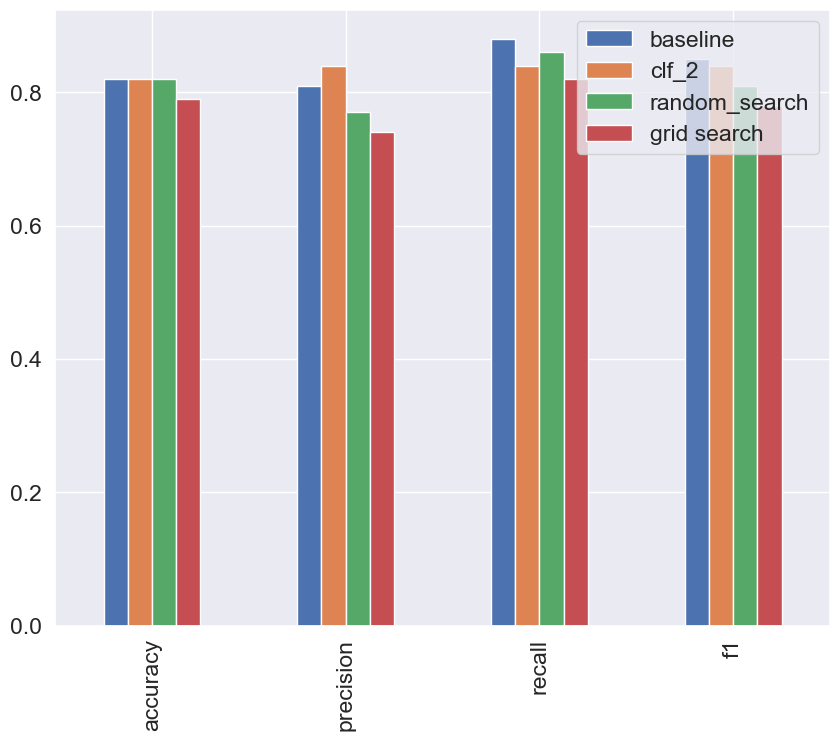

In [180]:
compare_metrics.plot.bar(figsize=(10, 8));

In [181]:
compare_metrics

,baseline,clf_2,random_search,grid search
accuracy,0.82,0.82,0.82,0.79
precision,0.81,0.84,0.77,0.74
recall,0.88,0.84,0.86,0.82
f1,0.85,0.84,0.81,0.78


In [182]:
what_were_covering

['0. An end to end Scikit-Learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together !']

## 6. Saving and loading trained machine learning model

Two ways to save and load machine learning models:
1. With Python's `pickle` module.
2. With the job `joblib` module.

**Pickle**

In [183]:
import pickle

# Save an existing model to file
pickle.dump(gs_clf, open("gs_random_forest_model_1.pkl", "wb")) # write binary

C:\Users\User\AppData\Local\Temp\ipykernel_24112\1773233004.py:4: ResourceWarning: unclosed file <_io.BufferedWriter name='gs_random_forest_model_1.pkl'>
  pickle.dump(gs_clf, open("gs_random_forest_model_1.pkl", "wb")) # write binary


In [184]:
# Load a saved model
loaded_pickle_model = pickle.load(open("gs_random_forest_model_1.pkl", "rb"))

C:\Users\User\AppData\Local\Temp\ipykernel_24112\289003379.py:2: ResourceWarning: unclosed file <_io.BufferedReader name='gs_random_forest_model_1.pkl'>
  loaded_pickle_model = pickle.load(open("gs_random_forest_model_1.pkl", "rb"))


In [185]:
# Make some predictions
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds);

Accuracy: 78.69 %
Precision: 74.19 %
Recall: 82.14 %
F1 score: 77.97 %


**Joblib**

In [186]:
from joblib import dump, load # if model is large.

# Save model to file
dump(gs_clf, filename="gs_random_forest_model_1.joblib")

['gs_random_forest_model_1.joblib']

In [187]:
# import a save joblib model
loaded_job_model = load(filename="gs_random_forest_model_1.joblib")

In [188]:
# Make and evaluate jobilb predictions
joblib_y_preds = loaded_job_model.predict(X_test)
evaluate_preds(y_test, joblib_y_preds)

Accuracy: 78.69 %
Precision: 74.19 %
Recall: 82.14 %
F1 score: 77.97 %


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

In [189]:
what_were_covering

['0. An end to end Scikit-Learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together !']

## 7. Putting it all together ! 

In [190]:
data = pd.read_csv("car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [191]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [192]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Steps we want to do (all in one cell):
    
1. Fill missing data
2. Convert data to number
3. Build a model on the data

In [193]:
# Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modeling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed
import numpy as np
np.random.seed(42)

# Import data and drop rows with missing labels
data = pd.read_csv("car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace=True)

# Define differents features and transformer pipeline
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")), # Imputer fills missing data.
    ("onehot", OneHotEncoder(handle_unknown="ignore"))]) # OneHotEncoder convert data to numbers.
door_features = ["Doors"]
door_transformer =  Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))])
numerical_features = ["Odometer (KM)"]
numerical_transformers = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))])

# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(
                    transformers=[
                        ("cat", categorical_transformer, categorical_features),
                        ("door", door_transformer, door_features),
                        ("num", numerical_transformers, numerical_features)
                    ])

# Create a preprocessing and modeling pipeline
model = Pipeline(steps=[("preprocessor", preprocessor),
                        ("model", RandomForestRegressor())])
    
# Split data
X = data.drop("Price", axis=1)
y = data["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
# Fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.22188417408787875

It's also possibe to use `GridSeachCV` and `RandomizedSearchCV` with our `Pipeline`.

In [194]:
# Use GridSearchCV with our regression Pipeline
from sklearn.model_selection import GridSearchCV

pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "model__n_estimators":[100, 1000],
    "model__max_depth":[None, 5],
    "model__max_features":["auto"],
    "model__min_samples_split":[2, 4]   
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_sampl

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
         

In [195]:
gs_model.score(X_test, y_test)

0.3339554263158365

In [196]:
def evaluate_preds_2(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels
    on a regression. 
    """
    r_2 = r2_score(y_true, y_preds)
    mean_absolute = mean_absolute_error(y_true, y_preds)
    mean_squared = mean_squared_error(y_true, y_preds)
    metric_dict = {"mean_absolute": round(mean_absolute, 2),
                  "mean_squared": round(mean_squared, 2),
                  "r_2": round(r_2, 2)}    
    print(f"R^2: {r_2*100:.2f} %")
    print(f"MAE: {mean_absolute}") 
    print(f"MSE: {mean_squared}")
    
    return metric_dict

In [197]:
gs_model_preds = gs_model.predict(X_test)
gs_model_metric = evaluate_preds_2(y_test, gs_model_preds)

R^2: 33.40 %
MAE: 5386.1633554267
MSE: 44598140.188705504
